# Reti neurali, modello di Hopfield e apprendimento

In questa tesina una rete neurale molto semplice è implementata seguendo il modello di Hopfield in modo da simulare il comportamento della memoria umana. La capacità di immagazzinamento di diversi pattern è investigata, così come la risposta a diverse temperature.
Alla fine, un algoritmo di apprendimento è implementato.




# Il modello e le semplificazioni

Seguendo il modello di Hopfield, modelliziamo un neurone come uno spin che può avere due valori, $s_i = +1$ $ o -1 $. I neuroni sono tutti connessi fra di loro, e possiamo definire una funzione "energia" nel modo seguente:

$ E = - \sum J_{ij} s_i s_j. $

dove le $ J_{ij} $ sono collegate alla forza della connessione fra i neuroni $ i $ e $ j $. Chiamiamo questa funzione energia in quanto le $ J_{ij} $ sono scelte in modo che la funzione sia simmetrica e sia quindi possibile applicare i metodi della meccanica statistica. In questo modello stiamo trascurando diverse caratteristiche del cervello, come il comportamento non lineare dei neuroni, il fatto che non agiscono in simultaneo, le connessioni non sono necessariamente simmetriche e non necessariamente tutti i neuroni sono collegati a tutti i neuroni. E' infatti appurato che questo modello è ben lontano dall'essere un modello affidabile per descrivere il cervello tuttavia ha stimolato numerosi progressi [Giordano, Computational Physic] [Introduction to the theory of neural computations] .
Per simulare la memoria umana dobbiamo immagazzinare dei pattern nella rete che dovranno poi essere richiamati quando immettiamo dei pattern simili. Vediamo un esempio.

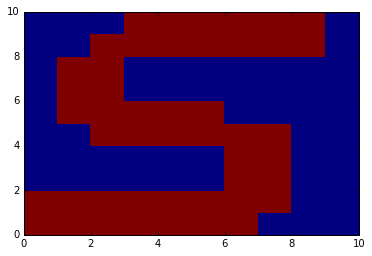

In [2]:
import numpy as np
import matplotlib.pyplot as mpl    #Importa librerie per grafici, calcoli, e fa si che vengano mostrati all'intenro del notebook
%matplotlib inline

#Il pattern desiderato è immagazzinato
S = [
   [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, 1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, -1, -1, -1]
   ];


S = np.flipud(S)  #gira il pattern sottosopra così da somigliare ad una S quando rappresentato con pcolor
mpl.pcolor(S)

Se immettiamo alla rete qualcosa che somiglia ad S, ci aspettiamo che S sia richiamato. Per implementare un meccanismo simile usiamo una simulazione Monte-Carlo con algoritmo Metropolis. Partiamo dal pattern che somiglia ad S e giriamo un neurone e se questa operazione risulta in un aumento di energia giriamo nuovamente il neurone. Facciamo ciò per ogni neurone della rete (uno step Monte-Carlo) finchè non raggiungiamo il minimo dell'energia.
Questo significa che dovremo definire le $ J_{ij} $ in modo tale che S sia un minimo per l'energia. Riferendoci ad un generico pattern con $ m $ possiamo porre

$ J_{ij}=s_i(m)s_j(m) $

che ovviamente soddisfa le nostre condizioni. Segue una rapida implementazione.

Questo?


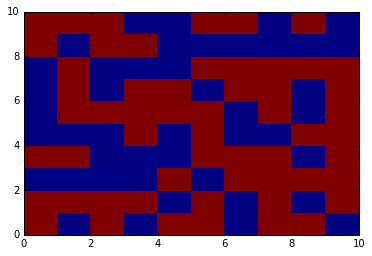

Mi ricorda questo!


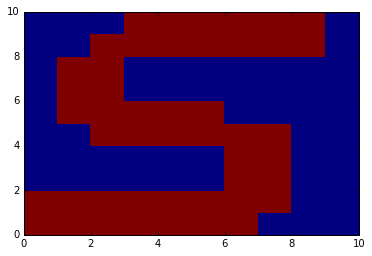

TypeError: print_figure() missing 1 required positional argument: 'filename'

<function __main__.simple_memory>

In [10]:
import numpy as np                 #Importa le librerie per grafici, operazioni matematica, stampare nel notebook i grafici
import matplotlib.pyplot as mpl    #e abilitare i widget
from ipywidgets import *
%matplotlib inline

J = np.zeros((10,10,10,10))    #Definiamo una matrie quadridimensionale per le J_ij

for k in range(10):
    for l in range(10):
        for m in range(10):
            for n in range(10):
                J[k,l,m,n] = S[k,l]*S[m,n]    #Assegniamo i valori
                
def H(A):                                        #Una funzione che calcola l'energia di una configurazione
    H = 0
    for k in range(10):
        for l in range(10):
             for m in range(10):
                for n in range(10):
                    H = H + (-J[k,l,m,n]*A[k,l]*A[m,n])
    return H 

simil_S = np.zeros((10,10))             #Costriamo un copia di S
np.copyto(simil_S,S)

def simple_memory(prob, max_cycles):    #Definiamo la funzione che stamperà i grafici, che dipendono da prob e max_cycles

    for i in range(10):
        for j in range(10):

            if np.random.randint(10) > prob:   #Modifichiamo in modo random il pattern simile ad S e stampiamo
                simil_S[i,j] = -simil_S[i,j]

    print("Questo?")
    mpl.figure()
    mpl.pcolor(simil_S)
    mpl.show()
    mpl.close()
    print("Mi ricorda questo!")

    for t in range(max_cycles):            #Il metodo Monte-Carlo!!!
        for i in range(10):
            for j in range(10):
                H_i = H(simil_S)
                simil_S[i,j] = -simil_S[i,j]
                H_f = H(simil_S)
                if H_f > H_i:
                    simil_S[i,j] = -simil_S[i,j]
        
        if (simil_S == S).all:  
            break
            
    mpl.figure()
    mpl.pcolor(simil_S)
    mpl.show()
    mpl.savefig()
    mpl.close()

interact(simple_memory, prob = (0, 10, 1), max_cycles = (1, 10, 1) );

#Nei grafici è possibile variare in modo interattivo la probabilità con cui un neurone viene girato e il numero
#di step Monte-Carlo da eseguire. Ad esempio, se prob = 4 e max_cycles = 6 avremo che ogni neurone aveva il 40% di
#probabilità di essere sostituito e vengono eseguiti non più di 6 step Monte-Carlo

Adesso la nostra rete è innamorato. Qualsiasi cosa le sottoponiamo, ci restituirà il pattern S o il suo contrario!

# Massimo numero di Pattern e effetto della temperatura

Possiamo immagazinare altri pattern molto semplicemente ridefinendo le $ J_{ij} $ nel seguente modo:

$ J_{ij} = \frac{1}{M} \sum\limits_M s_i(m)s_j(m) $.

Mediante le teorie di campo medie, si può arrivare a porre un limite massimo al numero di pattern di circa $ 0,13 $ volte il numero di neuroni. Tuttavia è molto difficile che una rete funzioni bene con così tanti pattern, a meno che questi non siano il più possibile perpendicolari. Inoltre si manifestano dei minimi spuri, dati dalla combinazione di diversi pattern, in generale meno profondi dei minimi desiderati. A tal scopo può essere utile introdurre una temperatura nel metodo Monte-Carlo, in modo che l'agitazione termica farà uscire la rete dai minimi indesiderati. Ovviamente una temperatura troppo alta farà si che il sistema  non si stabilizzi mai. Vediamo un esempio concreto.

In [1]:
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

#I pattern desiderati sono immagazzinati
S = [
   [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, 1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, -1, -1, -1]
   ];

S = np.flipud(S)
#mpl.pcolor(S)
#mpl.show()

A = [
    [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
    [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
    [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
   ];

A = np.flipud(A)
#mpl.pcolor(A)
#mpl.show()

R = [
    [-1, -1, 1, 1, 1, 1, 1, -1, -1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
    [1, 1, -1, -1, 1, 1, 1, -1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1]
   ];

R = np.flipud(R)
#mpl.pcolor(R)
#mpl.show()

H = [
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
   ];

H = np.flipud(H)
#mpl.pcolor(H)
#mlp.show()

Questo


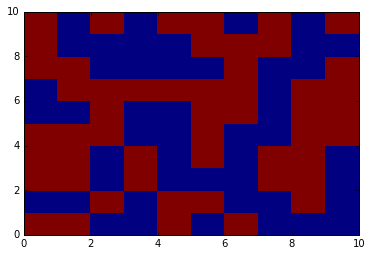

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
from ipywidgets import *
%matplotlib inline

J = np.zeros((10,10,10,10))

for k in range(10):
    for l in range(10):
        for m in range(10):
            for n in range(10):               
                J[k,l,m,n] = 1/4 * ( S[k,l]*S[m,n] + A[k,l]*A[m,n] + R[k,l]*R[m,n] + H[k,l]*H[m,n] )
                
def E(pattern):                #Adesso la chiamo E perchè il nome H è già occupato dal pattern H
    E = 0
    for k in range(10):
        for l in range(10):
            for m in range(10):
                for n in range(10):
                    E = E + (-J[k,l,m,n]*pattern[k,l]*pattern[m,n])
    return E  
                
def memory(pattern, T, prob, max_cycles):  #Stavolta la funzione dipende anche dal pattern immesso e dalla temperatura
                
    simil_pattern = np.zeros((10,10))
    
    if pattern==1:
        np.copyto(simil_pattern, S)
    elif pattern==2:
        np.copyto(simil_pattern, A)
    elif pattern==3:
        np.copyto(simil_pattern, R)
    elif pattern==4:
        np.copyto(simil_pattern, H)      

    for i in range(10):
            for j in range(10):

                if np.random.randint(10) > prob:
                    simil_pattern[i,j] = -simil_pattern[i,j]

    print("Questo")
    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()
    print("Mi ricorda questo!")

    for t in range(max_cycles):
        for i in range(10):
            for j in range(10):
                E_i = E(simil_pattern)
                simil_pattern[i,j] = -simil_pattern[i,j]
                E_f = E(simil_pattern)
                if E_f >= E_i:
                    simil_pattern[i,j] = -simil_pattern[i,j]
                elif E_f < E_i and T!=0:
                    DE = E_f-E_i
                    if np.exp(-1/T*DE) < np.random.rand(1, 1):
                        simil_pattern[i,j] = -simil_pattern[i,j]            

    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()

interact(memory, pattern=(1, 4, 1), T = (0, 10, 0.1), prob = (0, 10, 1), max_cycles = (1, 10, 1) );

#In questo caso è possibile scegliere quale pattern si vuole inserire. Inoltre è possibile scegliere un valore per la T

Con quattro pattern la memoria funziona molto bene, come si può vedere dal grafico interattivo. Ma se immagaziniamo dieci pattern, la memoria diventa già inservibile, come possiamo vedere nel prossimo esempio.

In [5]:
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

#Ancora più pattern!!
I = [
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1]
   ];

I = np.flipud(I)
#mpl.pcolor(I)
#mpl.show()

L = [
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, -1, -1, -1, -1],
   [1, 1, 1, 1, -1, -1, -1, -1, -1, -1]
   ];

L = np.flipud(L)
#mpl.pcolor(L)
#mpl.show()

V = [
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
   ];

V = np.flipud(V)
#mpl.pcolor(V)
#mpl.show()

Y = [
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1]
   ];

Y = np.flipud(Y)
#mpl.pcolor(Y)
#mpl.show()

O = [
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1]
   ];

O = np.flipud(O)
#mpl.pcolor(O)
#mpl.show()


U = [
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1]
   ];

U = np.flipud(U)
#mpl.pcolor(U)
#mpl.show()

S = [
   [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, 1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, -1, -1, -1]
   ];

S = np.flipud(S)
#mpl.pcolor(S)
#mpl.show()

A = [
    [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
    [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
    [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
   ];

A = np.flipud(A)
#mpl.pcolor(A)
#mpl.show()

R = [
    [-1, -1, 1, 1, 1, 1, 1, -1, -1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
    [1, 1, -1, -1, 1, 1, 1, -1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1]
   ];

R = np.flipud(R)
#mpl.pcolor(R)
#mpl.show()

H = [
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
   ];

H = np.flipud(H)
#mpl.pcolor(H)
#mlp.show()

Questo?


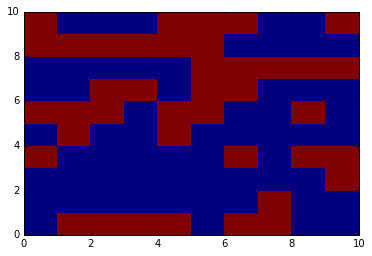

Mi ricorda questo!


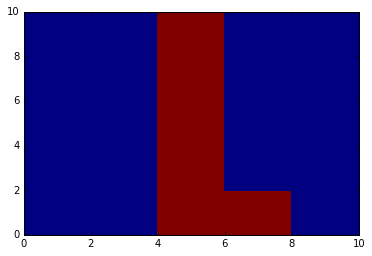

In [6]:
import numpy as np
import matplotlib.pyplot as mpl
from ipywidgets import *
%matplotlib inline

J = np.zeros((10,10,10,10))

for k in range(10):
    for l in range(10):
        for m in range(10):
            for n in range(10):
                
                J[k,l,m,n] = 1/7 * ( S[k,l]*S[m,n] + A[k,l]*A[m,n] + R[k,l]*R[m,n] + H[k,l]*H[m,n] +
                                    V[k,l]*V[m,n] + I[k,l]*I[m,n] + L[k,l]*L[m,n] )
                
def E(pattern):
    E = 0
    for k in range(10):
        for l in range(10):
            for m in range(10):
                for n in range(10):
                    E = E + (-J[k,l,m,n]*pattern[k,l]*pattern[m,n])
    return E
         
def memory(pattern, T, prob, max_cycles):
                
    simil_pattern = np.zeros((10,10))
    
    if pattern == 1:
        np.copyto(simil_pattern, I)
    elif pattern == 2:
        np.copyto(simil_pattern, L)
    elif pattern == 3:
        np.copyto(simil_pattern, A)
    elif pattern == 4:
        np.copyto(simil_pattern, V)
    elif pattern == 5:
        np.copyto(simil_pattern, Y)
    elif pattern == 6:
        np.copyto(simil_pattern, O)
    elif pattern == 7:
        np.copyto(simil_pattern, U) 
    elif pattern == 8:
        np.copyto(simil_pattern, S)
    elif pattern == 9:
        np.copyto(simil_pattern, R)
    elif pattern == 10:
        np.copyto(simil_pattern, H)      

    for i in range(10):
            for j in range(10):
                if np.random.randint(10) > prob:
                    simil_pattern[i,j] = -simil_pattern[i,j]

    print("Questo?")
    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()
    print("Mi ricorda questo!")

    for t in range(max_cycles):
        for i in range(10):
            for j in range(10):
                E_i = E(simil_pattern)
                simil_pattern[i,j] = -simil_pattern[i,j]
                E_f = E(simil_pattern)
                if E_f >= E_i:
                    simil_pattern[i,j] = -simil_pattern[i,j]
                elif E_f < E_i and T!=0:
                    DE = E_f-E_i
                    if np.exp(-1/T*DE) < np.random.rand(1, 1):
                        simil_pattern[i,j] = -simil_pattern[i,j]            

    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()

interact(memory, pattern=(1, 10, 1), T = (0, 10, 0.1), prob = (0, 10, 1), max_cycles = (1, 10, 1) );

# Apprendimento di nuovi pattern

Infine possiamo implementare un algoritmo di apprendimento, in pratica una volta immagazinate le $ J_{ij} $ dobbiamo ridefinirle seguendo l'equazione

$ J_{ij}(new) = \alpha J_{ij}(old) + \beta s_i(m) s_j(m) $ ,

dove $ s_i(m) s_j(m) $ sono le configurazioni del pattern da far apprendere mentre $ \alpha $ e $ \beta $ sono parametri che danno il peso alle diverse configurazioni. Vediamo cosa accade al variare dei parametri.

In [7]:
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

#Sisi ormai abbiamo capito, immagazziniamo i pattern...
S = [
   [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, 1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, -1, -1, -1]
   ];

S = np.flipud(S)
#mpl.pcolor(S)
#mpl.show()

H = [
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
   ];

H = np.flipud(H)
#mpl.pcolor(H)
#mlp.show()

Questo


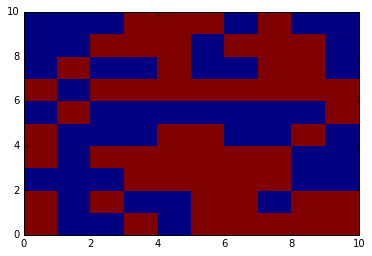

Mi ricorda questo!


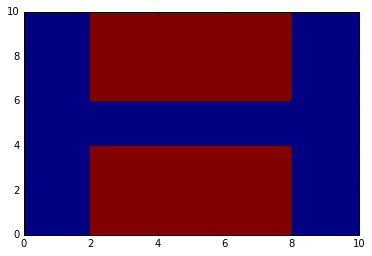

In [15]:
import numpy as np               
import matplotlib.pyplot as mpl   
from ipywidgets import *
%matplotlib inline

J = np.zeros((10,10,10,10))

for k in range(10):
    for l in range(10):
        for m in range(10):
            for n in range(10):
                J[k,l,m,n] = S[k,l]*S[m,n]    #Assegniamo i valori in modo da immagazzinare S
                
def E(pattern):
    E = 0
    for k in range(10):
        for l in range(10):
            for m in range(10):
                for n in range(10):
                    E = E + (-J[k,l,m,n]*pattern[k,l]*pattern[m,n])
    return E 

def learning_memory(a, b, pattern, prob, max_cycles):  #Stavolta la funzione dipende dei parametri a e b (alfa e beta)
    
    for k in range(10):
        for l in range(10):
            for m in range(10):
                for n in range(10):
                    J[k,l,m,n] = (a*J[k,l,m,n]) + (b*H[k,l]*H[m,n])   #Speriamo apprenda
     
    simil_pattern = np.zeros((10,10))
    
    if pattern==1:
        np.copyto(simil_pattern, S)
    elif pattern==2:
        np.copyto(simil_pattern, H)      

    for i in range(10):
            for j in range(10):
                if np.random.randint(10) > prob:
                    simil_pattern[i,j] = -simil_pattern[i,j]

    print("Questo")
    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()
    print("Mi ricorda questo!")

    for t in range(max_cycles):
        for i in range(10):
            for j in range(10):
                E_i = E(simil_pattern)
                simil_pattern[i,j] = -simil_pattern[i,j]
                E_f = E(simil_pattern)
                if E_f >= E_i:
                    simil_pattern[i,j] = -simil_pattern[i,j]            

    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()

learning_memory(0.5, 0.5, 2, 2, 5)


Provando l'algoritmo con diversi valori di $ \alpha $ e $ \beta $ notiamo che se uno di questi è zero, la rete ricorderà solo il patter il cui parametro è diverso da zero. Per valori intermedi dei parametri la rete tenderà a richiamare con maggiore frequenza quello con il parametro più elevato. Ciò E' ragionevole se pensiamo che l'equazione con cui definiamo le nuove connessioni fra neuroni non è altro che una media pesata delle connessioni dei vari pattern, a meno della divisione per la somma dei pesi. La formula per immagazzinare più pattern invece era proprio una media aritmetica delle interazioni dei pattern!


# Conclusioni

In conclusione, possiamo dire che una simile rete neurali è ispirata al cervello, ma si allontana molto da quest'ultimo, in altri termini il modello è troppo semplice per riprodurre le caratteristiche di un sistema così complesso. Giò con una decina di pattern la memoria è inservibile, cioè meno del limite teorico di $ 0,13 $ volte il numero di neuroni che nel nostro caso era tredici.
L'algoritmo per l'apprendimento permette di far apprendere nuovi pattern alla rete, quindi possiamo pensare di implementare delle reti che modifichino i pesi delle varie connessioni ogni volta che gli vengono immessi degli input.
Tale peculiarità delle reti neurali ne rende possibile l'utilizzo in numerose applicazioni, sopratutto in ambito informatico.